#### Imports

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from demografi import mergefunc
from demografi import cleanfunc


pd.set_option('display.max_columns', None)

####  Data directory

In [42]:
# Using assert to check that paths exist on computer.
assert os.path.isdir('C:/Users/juliu/Data')

# Print all data files
display(os.listdir('C:/Users/juliu/Data/Kilder1'))
os.listdir('C:/Users/juliu/Data/Kilder2')

['CBPs.csv',
 'CBPt.csv',
 'census1787t.csv',
 'census1801t.csv',
 'census1834t.csv',
 'census1840t.csv',
 'census1845t.csv',
 'census1850t.csv',
 'census1860t.csv',
 'census1880t.csv',
 'census1885t.csv',
 'census1901t.csv']

['CBPs.csv',
 'CBPt.csv',
 'census1787s.csv',
 'census1801s.csv',
 'census1834s.csv',
 'census1840s.csv',
 'census1845s.csv',
 'census1850s.csv',
 'census1860s.csv',
 'census1880s.csv',
 'census1885s.csv',
 'census1901s.csv']

#### 1. Initializing and cleaning census  data

In [3]:
#1.1 - Cleaning source datasets

#File paths to standardized datasets - manual addition of more datasets from project updates is possible,
#but must be accompanied by an updated name array that is used to name additional variables from each dataset, e.g. "event_parish_1787s"
#Example: Addition of source 11: PR Burials can be done by adding the corresponding .csv file to the end of the 'file_paths' list and
#running this code snippet before the iterator: name_array.append('PRB')

#OBS: datasets must be in correct numerical order according to the link-lives source enumeration. See: Readme.me


file_paths = ['C:/Users/juliu/Data/Kilder2/census1787s.csv',
 'C:/Users/juliu/Data/Kilder2/census1801s.csv',
 'C:/Users/juliu/Data/Kilder2/census1834s.csv',
 'C:/Users/juliu/Data/Kilder2/census1840s.csv',
 'C:/Users/juliu/Data/Kilder2/census1845s.csv',
 'C:/Users/juliu/Data/Kilder2/census1850s.csv',
 'C:/Users/juliu/Data/Kilder2/census1860s.csv',
 'C:/Users/juliu/Data/Kilder2/census1880s.csv',
 'C:/Users/juliu/Data/Kilder2/census1885s.csv',
 'C:/Users/juliu/Data/Kilder2/census1901s.csv']

name_array = [file_path[34:39] for file_path in file_paths]


#Cleaning iterator using the cleanfunc function from the .py file
census_datasets = []
for k, v in zip(file_paths, name_array):
    kilde = cleanfunc(k, v)
    census_datasets.append(kilde)



c:\Users\juliu\Demografi\demografi.py:10: DtypeWarning: Columns (6,32,40) have mixed types. Specify dtype option on import or set low_memory=False.
  kildesæt = pd.read_csv(kildesæt)
c:\Users\juliu\Demografi\demografi.py:10: DtypeWarning: Columns (6,30,32,40) have mixed types. Specify dtype option on import or set low_memory=False.
  kildesæt = pd.read_csv(kildesæt)
c:\Users\juliu\Demografi\demografi.py:10: DtypeWarning: Columns (21,22,24,26,32,40) have mixed types. Specify dtype option on import or set low_memory=False.
  kildesæt = pd.read_csv(kildesæt)
c:\Users\juliu\Demografi\demografi.py:10: DtypeWarning: Columns (30,32,40) have mixed types. Specify dtype option on import or set low_memory=False.
  kildesæt = pd.read_csv(kildesæt)
c:\Users\juliu\Demografi\demografi.py:10: DtypeWarning: Columns (6,27,28,30,32,40) have mixed types. Specify dtype option on import or set low_memory=False.
  kildesæt = pd.read_csv(kildesæt)
c:\Users\juliu\Demografi\demografi.py:10: DtypeWarning: Column

In [4]:
#1.2 - Identifying and separating the Copenhagen Burial Protocol observations in the life-courses dataset

#The Link-Lives dataset has 3,155,319 observations
lifecourses = 'C:/Users/juliu/Data/life_courses.csv'
lifecourses = pd.read_csv(lifecourses)



# Splitting the data sources and observation i.d.'s into separate columns in order to operate on them
lifecourses2 = lifecourses

lifecourses2[['source0', 'source1', 'source2', 'source3', 'source4', 'source5', 'source6',
               'source7', 'source8', 'source9', 'source10', 'source11', 'source12']]  = lifecourses2.source_ids.str.split(',', expand=True).astype('Int64')

lifecourses2[['pa_id0', 'pa_id1', 'pa_id2', 'pa_id3', 'pa_id4', 'pa_id5', 'pa_id6', 'pa_id7',
              'pa_id8', 'pa_id9', 'pa_id10', 'pa_id11', 'pa_id12']] = lifecourses2.pa_ids.str.split(',', expand=True).astype('str')


#Identifying and separating out the observations present in the Copenhagen Burial Protocols
I = lifecourses2.source_ids.str.contains('10')
lifecourses2.loc[I]
lifecourses2 = lifecourses2.loc[I]


#70,226 observations remain

#### 2. Merging data

In [43]:
#Merging the information in the (currently 9) standardized source datasets that contain CBP observations
#OBS: datasets must be in correct numerical order according to the link-lives source enumeration. See: Readme.me
merged_datasets = []
for i, census in enumerate(census_datasets):
    merged_dataset = mergefunc(lifecourses2, census, i)
    merged_datasets.append(merged_dataset)



In [44]:
#2.2 - Merging the source datasets into 1
concatenated_dataset = pd.concat(merged_datasets)

print(concatenated_dataset.shape)

(132168, 164)


In [7]:
#2.3 - Cleaning the merged dataset

#Ensuring that no information is lost
aggregation_functions = {}
for column in concatenated_dataset.columns:
    aggregation_functions[column] = 'first' # keep the first value of each column
    
concatenated_dataset_grouped = concatenated_dataset.groupby(['life_course_id']).aggregate(aggregation_functions)
 
#Cleaning variables
cleanedcensus0 = concatenated_dataset_grouped.drop(['pa_ids', 'link_ids', 'source0', 'source1', 'source2', 'source3', 'source4', 
'source5', 'source6', 'source7', 'source8', 'source9', 'source10', 'source11', 'source12', 'pa_id0', 'pa_id1', 'pa_id2', 'pa_id3', 'pa_id4',
'pa_id5', 'pa_id6', 'pa_id7', 'pa_id8', 'pa_id9', 'pa_id10', 'pa_id11', 'pa_id12', 'pa_id'], axis=1)
cleanedcensus0 = cleanedcensus0.dropna(axis=1, how='all')


#### 3. Copenhagen Burial Protocols

In [5]:
#3.1 - Initializing and cleaning variables

CBPs = 'C:/Users/juliu/Data/Kilder2/CBPs.csv'
CBPs = pd.read_csv(CBPs)

CBPt = 'C:/Users/juliu/Data/Kilder1/CBPt.csv'
CBPt = pd.read_csv(CBPt)

CBPt['pa_id'] = CBPt['pa_id'].astype(str)

CBPtmerg = mergefunc(lifecourses2, CBPt, 10) #merging the CBP information to the lifecourses dataset

CBPtmerg = CBPtmerg.drop(['pa_ids', 'link_ids', 'source_ids', 'source0', 'source1', 'source2', 'source3', 'source4', 
'source5', 'source6', 'source7', 'source8', 'source9', 'source10', 'source11', 'source12', 'pa_id0', 'pa_id1', 'pa_id2', 'pa_id3', 'pa_id4',
'pa_id5', 'pa_id6', 'pa_id7', 'pa_id8', 'pa_id9', 'pa_id10', 'pa_id11','pa_id', 'pa_id12', 'id'], axis=1) #dropping the columns needed to correctly identify observations


C:\Users\juliu\AppData\Local\Temp\ipykernel_14840\84755752.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  CBPs = pd.read_csv(CBPs)
C:\Users\juliu\AppData\Local\Temp\ipykernel_14840\84755752.py:7: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  CBPt = pd.read_csv(CBPt)


In [72]:
CBPtmerg['pa_id'] = CBPtmerg['pa_id'].astype(str)

In [6]:
duplicate_rows = CBPtmerg[CBPtmerg.duplicated(subset='pa_id', keep=False)]

# Print the duplicate rows
display(duplicate_rows)

,life_course_id,n_sources,pa_id,number,firstnames,lastname,birthname,ageYears,ageMonth,ageWeeks,ageDays,ageHours,dateOfBirth,dateOfDeath,yearOfBirth,deathplace,civilstatus,adressOutsideCph,sex,comment,cemetary,chapel,parish,street,hood,street_unique,street_number,letter,floor,institution,institution_street,institution_hood,institution_street_unique,institution_street_number,positions,relationtypes,workplaces,deathcauses
42,20977,2,99275,2764.0,Andreas,Nielsen,NaN,51.0,NaN,NaN,NaN,NaN,NaN,1885-05-12,1834.0,NaN,Gift,Roskilde mark,Mand,NaN,Trinitatis Assistens,"Assistens Kirkegård, - Kapel, Lighus, Ligkapel...",Trinitatis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jordbruger,Eget erhverv,NaN,Lungetæring
43,20978,2,99275,2764.0,Andreas,Nielsen,NaN,51.0,NaN,NaN,NaN,NaN,NaN,1885-05-12,1834.0,NaN,Gift,Roskilde mark,Mand,NaN,Trinitatis Assistens,"Assistens Kirkegård, - Kapel, Lighus, Ligkapel...",Trinitatis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jordbruger,Eget erhverv,NaN,Lungetæring
107,48194,2,326093,4598.0,Constantin,Olsen,NaN,67.0,NaN,NaN,NaN,NaN,NaN,1896-09-07,1829.0,NaN,Ugift,NaN,Mand,NaN,Assistens Kirkegård,"Assistens Kirkegård, - Kapel, Lighus, Ligkapel...",NaN,Frederiksberg Allé,Vesterbro,Frederiksberg Allé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Billedhugger,Forhenværende/pensioneret,NaN,"Emphysema (Emphysem, Emfysem),Bronchitis (Bron..."
110,52241,2,143824,385.0,Lauritz Christian,Jensen,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1890-01-14,1885.0,NaN,NaN,NaN,Mand,NaN,Vestre Kirkegård,Blegdamshospitalet (BH),Sankt Matthæus,Dannebrogsgade,Vesterbro,Dannebrogsgade (Vesterbro),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sandgraver,Fars erhverv,NaN,Croup
111,52242,2,143824,385.0,Lauritz Christian,Jensen,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1890-01-14,1885.0,NaN,NaN,NaN,Mand,NaN,Vestre Kirkegård,Blegdamshospitalet (BH),Sankt Matthæus,Dannebrogsgade,Vesterbro,Dannebrogsgade (Vesterbro),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sandgraver,Fars erhverv,NaN,Croup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1724455,11,308257,3087.0,Martha Vilhelmine,Jensen,NaN,78.0,NaN,NaN,NaN,NaN,1841-05-23,1919-07-27,1841.0,NaN,Enkestand,NaN,Kvinde,NaN,Holmens Kirkegård (Skibs),Holmens Kapel,"De Gamles By, Nørre Allé, København (1918- )",Nørre Allé,Nørrebro,Nørre Allé,41.0,NaN,NaN,"De Gamles By, Nørre Alle, København - (1919 - )",Nørre Allé,Nørrebro,Nørre Allé,41.0,Arbejdsmand (Arbeidsmand - Arbejder - Arbeider),Ægtefælles erhverv,NaN,"Morbus cordis (Mb. cordis, Mb. cord.),Pleuritis"
14,2034201,11,3868,3837.0,Carl Marius,Smidt,NaN,83.0,NaN,NaN,NaN,NaN,NaN,1910-09-19,1827.0,NaN,Gift,NaN,Mand,NaN,Vestre Kirkegård,Nordre Kapel - Vestre (Ndr),Nazareths,Ryesgade,Nørrebro,Ryesgade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sognepræst,Forhenværende/pensioneret,NaN,"Senilia,Arteriosclerosis (Arteriosclerose)"
16,2862994,12,162636,7567.0,Ludvig Peter,Fenger,NaN,71.0,NaN,NaN,NaN,NaN,NaN,1905-03-09,1834.0,Kommunehospitalet (KH),Gift,NaN,Mand,NaN,Vestre Kirkegård,Vor Frelser Kirke,Sankt Jakobs (Sankt Jacobs),Frederiksstadsgade,Vesterbro,Frederiksstadsgade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Professor,Stadsarkitekt (Stadsarchitecht)","Eget erhverv,Forhenværende/pensioneret",NaN,"Morbus cordis (Mb. cordis, Mb. cord.)"
17,2862995,12,162636,7567.0,Ludvig Peter,Fenger,NaN,71.0,NaN,NaN,NaN,NaN,NaN,1905-03-09,1834.0,Kommunehospitalet (KH),Gift,NaN,Mand,NaN,Vestre Kirkegård,Vor Frelser Kirke,Sankt Jakobs (Sankt Jacobs),Frederiksstadsgade,Vesterbro,Frederiksstadsgade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Professor,Stadsarkitekt (Stadsarchitecht)","Eget erhverv,Forhenværende/pensioneret",NaN,"Morbus cordis (Mb. cordis, Mb. cord.)"


In [61]:
df_not_in_df2 = CBPt[~CBPt['pa_id'].isin(CBPtmerg['pa_id'])]

df_not_in_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323307 entries, 0 to 388056
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   pa_id                      323307 non-null  object 
 1   id                         323307 non-null  int64  
 2   number                     323291 non-null  float64
 3   firstnames                 323307 non-null  object 
 4   lastname                   323307 non-null  object 
 5   birthname                  24811 non-null   object 
 6   ageYears                   285552 non-null  float64
 7   ageMonth                   72383 non-null   float64
 8   ageWeeks                   15169 non-null   float64
 9   ageDays                    13446 non-null   float64
 10  ageHours                   4984 non-null    float64
 11  dateOfBirth                59636 non-null   object 
 12  dateOfDeath                322443 non-null  object 
 13  yearOfBirth                28

In [62]:
df_not_in_df2true = df_not_in_df2[df_not_in_df2['ageYears'] >= 5]

In [30]:
df_not_in_df2true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157315 entries, 5 to 388056
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   pa_id                      157315 non-null  object 
 1   id                         157315 non-null  int64  
 2   number                     157314 non-null  float64
 3   firstnames                 157315 non-null  object 
 4   lastname                   157315 non-null  object 
 5   birthname                  16007 non-null   object 
 6   ageYears                   157315 non-null  float64
 7   ageMonth                   3767 non-null    float64
 8   ageWeeks                   25 non-null      float64
 9   ageDays                    11 non-null      float64
 10  ageHours                   30 non-null      float64
 11  dateOfBirth                26090 non-null   object 
 12  dateOfDeath                157254 non-null  object 
 13  yearOfBirth                15

In [63]:
finaltru = pd.read_csv('finaldata8.csv')


C:\Users\juliu\AppData\Local\Temp\ipykernel_14840\3144627823.py:1: DtypeWarning: Columns (12,18,27,28,29,30,31,32,33,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  finaltru = pd.read_csv('finaldata8.csv')


In [64]:
finaltru = finaltru[finaltru['ageYears'] >= 5]

In [33]:
display(df_not_in_df2true.info())
display(finaltru.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157315 entries, 5 to 388056
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   pa_id                      157315 non-null  object 
 1   id                         157315 non-null  int64  
 2   number                     157314 non-null  float64
 3   firstnames                 157315 non-null  object 
 4   lastname                   157315 non-null  object 
 5   birthname                  16007 non-null   object 
 6   ageYears                   157315 non-null  float64
 7   ageMonth                   3767 non-null    float64
 8   ageWeeks                   25 non-null      float64
 9   ageDays                    11 non-null      float64
 10  ageHours                   30 non-null      float64
 11  dateOfBirth                26090 non-null   object 
 12  dateOfDeath                157254 non-null  object 
 13  yearOfBirth                15

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57902 entries, 0 to 65504
Data columns (total 143 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    source_ids                 57902 non-null  object 
 1    n_sources                  57902 non-null  int64  
 2    name_cl                    57902 non-null  object 
 3    name                       57902 non-null  object 
 4    first_names                57361 non-null  object 
 5    patronyms                  28777 non-null  object 
 6    family_names               23011 non-null  object 
 7    maiden_names               5865 non-null   object 
 8    all_patronyms              32135 non-null  object 
 9    all_family_names           24635 non-null  object 
 10   uncat_names                6508 non-null   object 
 11   sex                        57902 non-null  object 
 12   marital_status_1787s       7 non-null      object 
 13   age_1787s                  7 

None

In [34]:
common_columns = list(set(df_not_in_df2true.columns).intersection(finaltru.columns))

In [35]:
df_not_in_df2true['sex'].value_counts() / len(df_not_in_df2true)
finaltru['sex'].value_counts() / len(finaltru)




m    0.502072
f    0.497928
Name: sex, dtype: float64

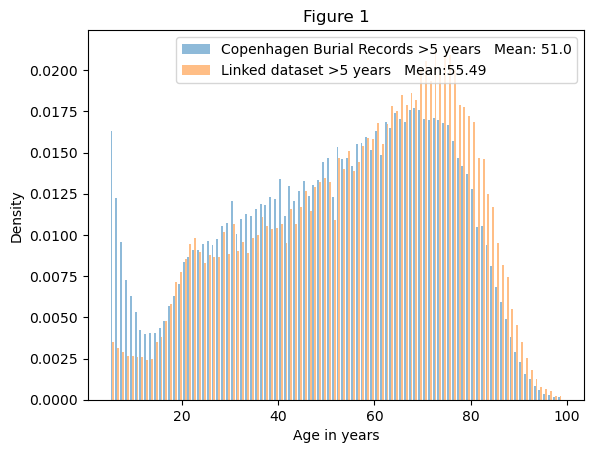

In [67]:
mean_age_df_not_in_df2true = df_not_in_df2true['ageYears'].mean()
mean_age_finaltru = finaltru['ageYears'].mean()

plt.hist([df_not_in_df2true['ageYears'].dropna(), finaltru['ageYears'].dropna()], bins=range(5, 100), alpha=0.5, label=['Copenhagen Burial Records >5 years   Mean: 51.0', 'Linked dataset >5 years   Mean:55.49' ], density=True)
plt.xlabel('Age in years')
plt.ylabel('Density')
plt.title('Figure 1')
plt.legend()
plt.show()

In [68]:
civilstatus_freq_df_not_in_df2true = df_not_in_df2true['civilstatus'].value_counts(normalize=True)
civilstatus_freq_finaltru = finaltru['civilstatus'].value_counts(normalize=True)

In [71]:
display(civilstatus_freq_df_not_in_df2true)
display(civilstatus_freq_finaltru)

Gift                     0.442800
Enkestand                0.273697
Ugift                    0.246988
Vides ikke (ukendt,?)    0.012635
Separeret                0.009249
Skilt                    0.009002
Forladt                  0.004614
Uægte barn               0.000543
Ægtefødt barn            0.000367
Hittebarn                0.000078
Forældreløs              0.000028
Name: civilstatus, dtype: float64

Gift                     0.415240
Enkestand                0.298292
Ugift                    0.257053
Vides ikke (ukendt,?)    0.009950
Separeret                0.007931
Skilt                    0.007440
Forladt                  0.003729
Ægtefødt barn            0.000200
Uægte barn               0.000146
Forældreløs              0.000018
Name: civilstatus, dtype: float64

In [77]:
display(civilstatus_freq_df_not_in_df2true.sum())
display(civilstatus_freq_finaltru.sum())

1.0

1.0

In [73]:
import statsmodels.stats.proportion as proportion

# Count the number of 'Ugift' in each dataframe
count_df_not_in_df2true = (df_not_in_df2true['civilstatus'] == 'Ugift').sum()
count_finaltru = (finaltru['civilstatus'] == 'Ugift').sum()

# Get the number of observations in each dataframe
nobs_df_not_in_df2true = df_not_in_df2true['civilstatus'].count()
nobs_finaltru = finaltru['civilstatus'].count()

# Perform the test
z_stat, p_val = proportion.proportions_ztest([count_df_not_in_df2true, count_finaltru], [nobs_df_not_in_df2true, nobs_finaltru])

print('z statistic:', z_stat)
print('p-value:', p_val)

z statistic: -4.627786247227459
p-value: 3.695951913653264e-06


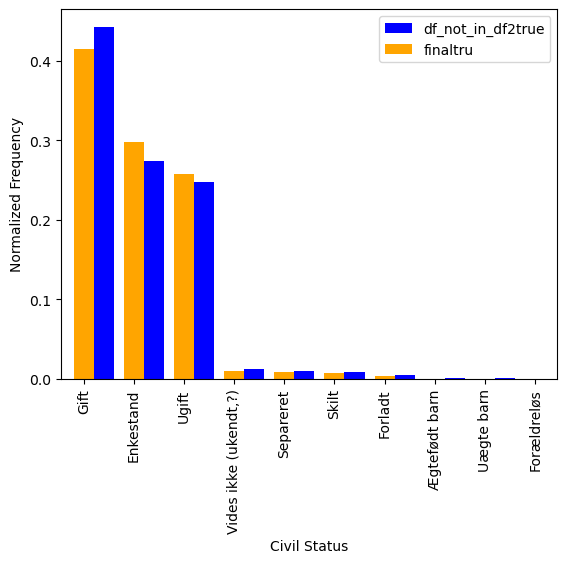

In [69]:
# Create figure and axes
fig, ax = plt.subplots()

# Plot bar chart for df_not_in_df2true
civilstatus_freq_df_not_in_df2true.plot(kind='bar', position=0, width=0.4, color='blue', align='edge', label='df_not_in_df2true')

# Plot bar chart for finaltru
civilstatus_freq_finaltru.plot(kind='bar', position=1, width=0.4, color='orange', align='edge', label='finaltru')

# Set labels and legend
plt.xlabel('Civil Status')
plt.ylabel('Normalized Frequency')
plt.legend()

plt.show()

In [74]:
# Get frequency of each category in 'hood' for both dataframes
hood_freq_df_not_in_df2true = df_not_in_df2true['hood'].value_counts(normalize=True)
hood_freq_finaltru = finaltru['hood'].value_counts(normalize=True)

In [76]:
display(hood_freq_df_not_in_df2true)
display(hood_freq_finaltru )

Indre By           0.417333
Nørrebro           0.225678
Vesterbro          0.117215
Østerbro           0.065405
Christianshavn     0.061645
Frederiksberg      0.039016
Amager Vest        0.017658
Amager Øst         0.016928
Valby              0.010998
Bispebjerg         0.010138
Gentofte           0.007962
Kongens Enghave    0.003882
Brønshøj-Husum     0.003577
Vanløse            0.002527
Vestrebro          0.000030
Indre by           0.000008
Name: hood, dtype: float64

Indre By           0.451467
Nørrebro           0.211630
Vesterbro          0.111065
Østerbro           0.061279
Christianshavn     0.056785
Frederiksberg      0.047031
Amager Vest        0.014517
Amager Øst         0.013503
Valby              0.009195
Gentofte           0.007973
Bispebjerg         0.007932
Brønshøj-Husum     0.002899
Kongens Enghave    0.002527
Vanløse            0.002174
Vestrebro          0.000021
Name: hood, dtype: float64

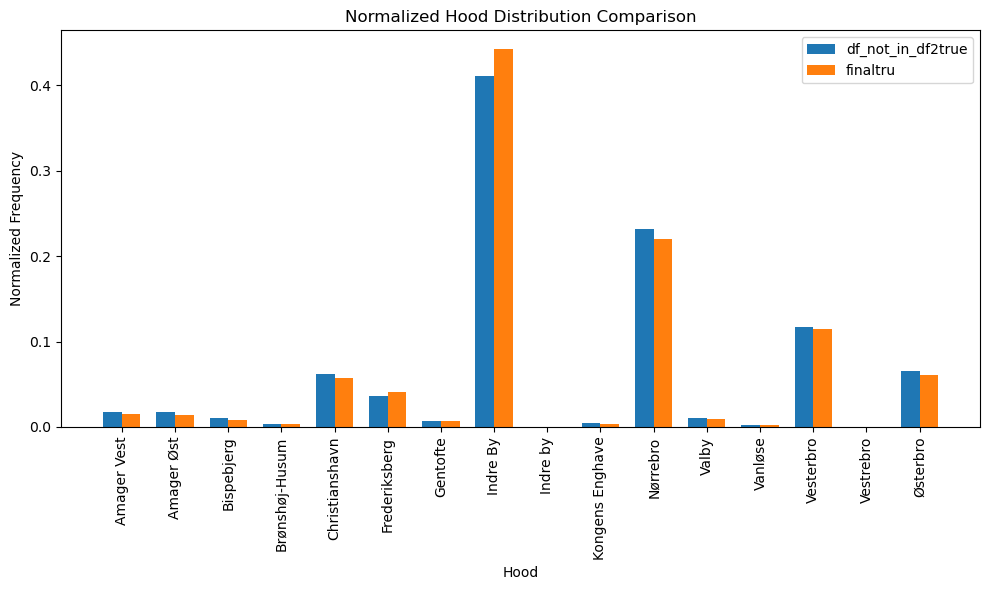

In [92]:
hood_counts_df_not_in_df2true = df_not_in_df2true.groupby(['hood', 'age_group']).size().unstack(fill_value=0)
hood_counts_finaltru = finaltru.groupby(['hood', 'age_group']).size().unstack(fill_value=0)

# Calculate the normalized hood distributions within each age group
hood_dist_df_not_in_df2true = hood_counts_df_not_in_df2true.div(hood_counts_df_not_in_df2true.sum(axis=0), axis=1)
hood_dist_finaltru = hood_counts_finaltru.div(hood_counts_finaltru.sum(axis=0), axis=1)

# Get the unique hood values from both dataframes
unique_hoods = sorted(set(hood_dist_df_not_in_df2true.index) | set(hood_dist_finaltru.index))

# Reindex both dataframes with the unique hood values
hood_dist_df_not_in_df2true = hood_dist_df_not_in_df2true.reindex(index=unique_hoods, fill_value=0)
hood_dist_finaltru = hood_dist_finaltru.reindex(index=unique_hoods, fill_value=0)

# Create grouped bar chart
x = np.arange(len(unique_hoods))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for df_not_in_df2true
bars1 = ax.bar(x - width/2, hood_dist_df_not_in_df2true.mean(axis=1), width, label='df_not_in_df2true')

# Plot bars for finaltru
bars2 = ax.bar(x + width/2, hood_dist_finaltru.mean(axis=1), width, label='finaltru')

# Set labels and legend
ax.set_xlabel('Hood')
ax.set_ylabel('Normalized Frequency')
ax.set_title('Normalized Hood Distribution Comparison')
ax.set_xticks(x)
ax.set_xticklabels(unique_hoods, rotation='vertical')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


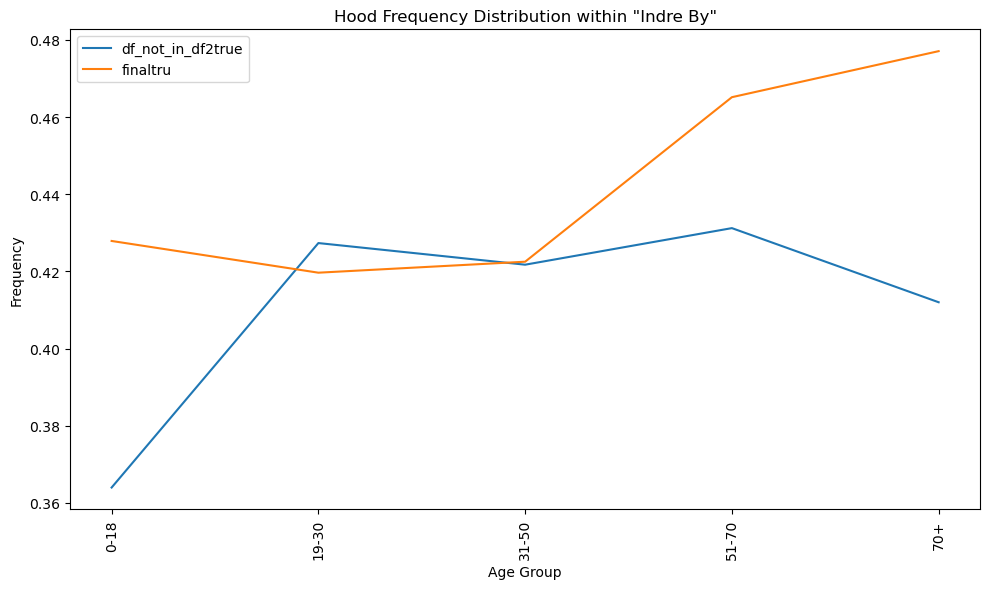

In [95]:
# Select the "Indre By" hood from both dataframes
hood_dist_df_not_in_df2true_indreby = hood_dist_df_not_in_df2true.loc['Indre By']
hood_dist_finaltru_indreby = hood_dist_finaltru.loc['Indre By']

# Create line chart
x = np.arange(len(hood_dist_df_not_in_df2true_indreby))
labels = hood_dist_df_not_in_df2true_indreby.index

fig, ax = plt.subplots(figsize=(10, 6))

# Plot line chart for df_not_in_df2true
ax.plot(x, hood_dist_df_not_in_df2true_indreby, label='df_not_in_df2true')

# Plot line chart for finaltru
ax.plot(x, hood_dist_finaltru_indreby, label='finaltru')

# Set labels and legend
ax.set_xlabel('Age Group')
ax.set_ylabel('Frequency')
ax.set_title('Hood Frequency Distribution within "Indre By"')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [78]:
display(hood_freq_df_not_in_df2true.sum())
display(hood_freq_finaltru.sum())

1.0

1.0

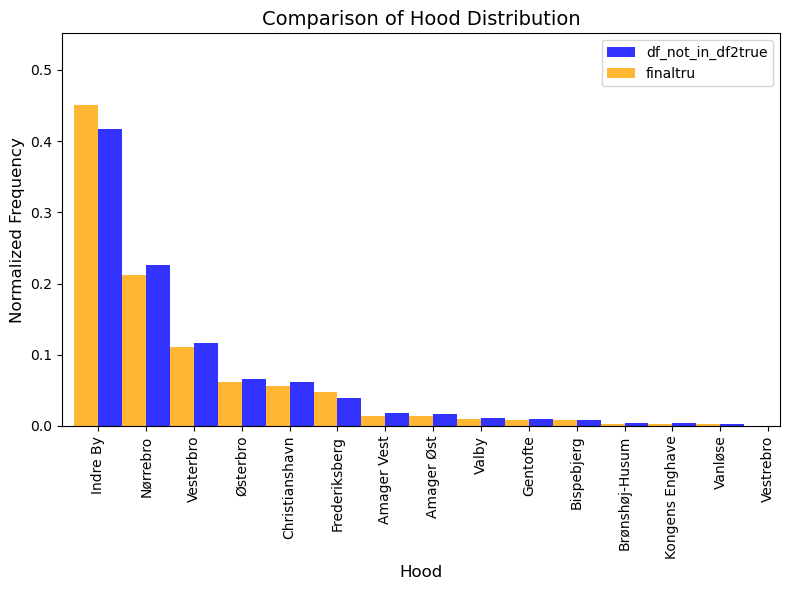

In [81]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Sort categories by frequency in each dataframe
sorted_hood_df_not_in_df2true = hood_freq_df_not_in_df2true.sort_values(ascending=False)
sorted_hood_finaltru = hood_freq_finaltru.sort_values(ascending=False)

# Plot vertical bar chart
sorted_hood_df_not_in_df2true.plot(kind='bar', position=0, color='blue', alpha=0.8, label='df_not_in_df2true')
sorted_hood_finaltru.plot(kind='bar', position=1, color='orange', alpha=0.8, label='finaltru')

# Set labels and legend
plt.xlabel('Hood', fontsize=12)
plt.ylabel('Normalized Frequency', fontsize=12)
plt.legend(fontsize=10)

# Rotate x-axis tick labels for better visibility
plt.xticks(rotation=90, fontsize=10)

# Add a title
plt.title('Comparison of Hood Distribution', fontsize=14)

# Adjust y-axis limits to fit all categories
plt.ylim(0, max(max(sorted_hood_df_not_in_df2true), max(sorted_hood_finaltru)) + 0.1)

# Show the plot
plt.tight_layout()
plt.show()

In [54]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
mw_stat, mw_p_val = mannwhitneyu(df_not_in_df2true['ageYears'].dropna(), finaltru['ageYears'].dropna())

print("Mann-Whitney U test statistic:", mw_stat)
print("Mann-Whitney U p-value:", mw_p_val)

Mann-Whitney U test statistic: 3786981470.0
Mann-Whitney U p-value: 2.3240221795096712e-156


In [66]:
# Calculate mean age for df_not_in_df2true
mean_age_df_not_in_df2true = df_not_in_df2true['ageYears'].mean()
print('Mean age in df_not_in_df2true:', mean_age_df_not_in_df2true)

# Calculate mean age for finaltru
mean_age_finaltru = finaltru['ageYears'].mean()
print('Mean age in finaltru:', mean_age_finaltru)

Mean age in df_not_in_df2true: 51.01676890315609
Mean age in finaltru: 55.48639079824531


In [76]:
lifecourses = 'C:/Users/juliu/Data/life_courses.csv'
lifecourses = pd.read_csv(lifecourses)


In [9]:
cleanedcensus1 = cleanedcensus0.set_index('life_course_id')
CBPtmerg1 = CBPtmerg.set_index('life_course_id')


finaldata = cleanedcensus1.merge(CBPtmerg1, on='life_course_id', how='left')

finaldata = finaldata.rename(columns={'n_sources_x':'n_sources', 'sex_x':'sex'})

finaldata = finaldata.drop(['n_sources_y', 'sex_y'], axis=1)

finaldata = finaldata.drop(['firstnames', 'lastname', 'birthname', 'number', 'dateOfBirth', 'yearOfBirth', 'street_unique'], axis=1)




In [ ]:
#Creating .csv file in local directory
finaldata.to_csv('finaldata.csv', index=False)

In [ ]:
non_nan_values = finaldata.dropna(subset=['adressOutsideCph'])

# Print a sample of 5 non-NaN values
sample = non_nan_values.sample(5)
display(sample)

In [ ]:
freq_dist = finaldata['birth_place'].value_counts()
freq_table = pd.DataFrame({'Value': freq_dist.index, 'Count': freq_dist.values})
freq_table_sorted = freq_table.sort_values(by='Count', ascending=False)

# Display the full output without extra space
print(freq_table_sorted.to_string(index=False, justify='left'))

In [ ]:
freq_dist = finaldata['cemetary'].value_counts()
freq_table = pd.DataFrame({'Value': freq_dist.index, 'Count': freq_dist.values})
freq_table_sorted = freq_table.sort_values(by='Count', ascending=False)

# Display the full output without extra space
print(freq_table_sorted.to_string(index=False, justify='left'))

In [41]:


freq_dist = finaldata['deathcauses'].value_counts()
freq_table = pd.DataFrame({'Value': freq_dist.index, 'Count': freq_dist.values})
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', 60)  # Adjust the maximum width for column display

print(freq_table.sort_values(by='Count', ascending=False))

                                                             Value  Count
0                            Morbus cordis (Mb. cordis, Mb. cord.)   2629
1                               Tuberculosis pulmonum (Tub. pulm.)   2369
2                                                         Phthisis   1980
3                                    Cancer ventriculi (C. ventr.)   1585
4                                             Pneumonia (Pneumoni)   1441
5                                                Apoplexia cerebri   1268
6                               Phthisis pulmonum (Phthisis pulm.)   1073
7                                                 Bronchopneumonia    807
8             Pneumonia crouposa (Pneumonia croup., Pneum. croup.)    735
9                                                    Lungesvindsot    708
10                                                        Alderdom    702
11                                          Apoplexia  (Apopleksi)    631
12                                    

In [ ]:

# Assuming the data is stored in a pandas DataFrame called df
# Also assuming that the 'cause of death' column is called 'cause_of_death'
finaldata['deathcauses'] = finaldata['deathcauses'].fillna('Unknown')

# Define the categories
death_causes_ICD10 = {
    'Morbus cordis (Mb. cordis, Mb. cord.)': 'I51.9',
    'Tuberculosis pulmonum (Tub. pulm.)': 'A15.0',
    'Phthisis': 'A15.0',
    'Cancer ventriculi (C. ventr.)': 'C16.9',
    'Pneumonia (Pneumoni)': 'J18.9',
    'Apoplexia cerebri': 'I64',
    'Phthisis pulmonum (Phthisis pulm.)': 'A15.0',
    'Bronchopneumonia': 'J18.0',
    'Pneumonia crouposa (Pneumonia croup., Pneum. croup.)': 'J18.1',
    'Lungesvindsot': 'A15.0', # Assumed to be lung tuberculosis
    'Alderdom': 'R54',
    'Apoplexia  (Apopleksi)': 'I64',
    'Lungebetændelse': 'J18.9',
    'Hæmorrhagia cerebri (Haemorrhagia cerebri)': 'I61.9',
    'Senilia': 'R54',
    'Marasmus senilis': 'R54',
    'Pludselig død (Død pludselig)': 'R99',
    'Emollitio cerebri': 'I67.9', # Assumed to be a cerebral condition
    'Alderdomssvaghed': 'R54',
    'Cancer uteri': 'C55',
    'Hængning': 'X70',
    'Kræft': 'C80.1', # General code for malignant neoplasm
    'Tuberculosis (Tuberkulose)': 'A15.9',
    'Senilitas': 'R54',
    'Cancer abdominis (C. abdominalis, C. abdom.)': 'C76.2',
    'Hjertesygdom': 'I51.9',
    'Peritonitis': 'K65.9',
    'Bronchitis (Bronkitis)': 'J40',
    'Cancer hepatis': 'C22.9',
    'Ukendt (Ubekendt, Ubekjendt)': 'R99',
    'Nephritis (Nefritis)': 'N05.9',
    'Influenza,Pneumonia (Pneumoni)': 'J11.0',
    'Lungetuberkulose (Lungetuberculosis, Lungetub.)': 'A15.0',
    'Meningitis': 'G03.9',
    'Nephritis chron. (Nefritis chron.)': 'N03.9',
    'Cancer oesophagi (Cancer øsophagi)': 'C15.9',
    'Brystsyge': 'J98.9', # Assumed to be a respiratory condition
    'Bronchitis chron.': 'J42',
    'Morbus cordis chron. (Morbus chron. cordis, Mb. cord. ch...)': 'I51.9',
    'Cancer recti (C. recti)': 'C20',
    'Febris typhoidea (Fb. typhoidea, Febr. typh.)': 'A01.0',
    'Diphteria (Diphteritis, Difteri)': 'A36.9',
    'Degeneratio myocardii (Deg. myocardii)': 'I51.5',
    'Meningitis tuberculosa (Tuberkuløs meningit.)': 'A17.0',
    'Influenza': 'J11.1',
    'Cancer mammae': 'C50.9',
    'Arteriosclerosis (Arteriosclerose)': 'I70.90',
    'Diabetes mellitus': 'E14.9',
    'Kronisk hjertesygdom (Chronisk Hjertesygdom)': 'I51.6',
    'Morbus Brightii (Mb. Brightii, Brights nyresygdom)': 'N03.9',
    'Cirrhosis hepatis': 'K74.60',
    'Degeneratio cordis (Degen. cordis, Deg. cordis)': 'I51.5',
    'Influenza,Bronchopneumonia': 'J11.0',
    'Organisk hjertesygdom': 'I51.6',
    'Kræft i maven (Mavekræft)': 'C16.9',
    'Tumor cerebri': 'C71.9',
    'Tuberculosis pulmonum et laryngis (Tub. pulmon. et  lary...)': 'A15.3',
    'Cancer': 'C80.1',
    'Scarlatina': 'A38',
    'Uræmia (Uræmi)': 'N19',
    'Drukning (Druknet )': 'X71',
    'Encephalopathia': 'G93.40',
    'Delirium tremens (Delir. tremens, Del. tremens. D. t.)': 'F10.231',
    'Debilitas senilis (Debilitas in senilitate, Debilitas se...)': 'R54',
    'Tuberculosis pulmonum et intestin. (Tub. pulm. et intest...)': 'A15.3',
    'Underlivsbetændelse': 'N71.9', # Assumed to be pelvic inflammatory disease
    'Dementia paralytica': 'A52.1',
    'Hjerneapopleksi (Hjerneapoplexi)': 'I64',
    'Ileus': 'K56.7',
    'Bronchitis capillaris (Bronchit. capill., Bronch. cap.)': 'J40',
    'Cystitis': 'N30.9',
    'Paresis cordis': 'I50.1',
    'Emphysema pulmonum (Emfysema pulm.)': 'J43.9',
    'Paralysis cordis': 'I50.1',
    'Alderdomssvækkelse  (Senil svækkelse)': 'R54',
    'Hjernebetændelse': 'G03.9',
    'Febris puerperalis': 'O85',
    'Kræft i underlivet (Underlivskræft)': 'C57.9',
    'Insufficientia cordis (Insuff. cordis)': 'I50.9',
    'Hjerneblødhed': 'I61.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Paresis cordis': 'I51.9, I50.1',
    'Brystbetændelse': 'N61',
    'Pleuritis': 'J90.9',
    'Cancer ventriculi et hepatis': 'C16.9, C22.9',
    'Influenzapneumoni (Influenzapneumonia)': 'J11.0',
    'Embolia arteriae pulmonalis (Embolia art. pulm.)': 'I26.9',
    'Lungetæring': 'A15.0',
    'Unknown': 'R99',
    'Emphysema (Emphysem, Emfysem)': 'J43.9',
    'Pyæmia (Pyaemia, Pyæmi)': 'A41.9',
    'Kronisk hjernesygdom (Chronisk Hjernesygdom)': 'G93.9',
    'Degeneratio myocardii (Deg. myocardii),Paresis cordis': 'I51.5, I50.1',
    'Pneumonia catarrhalis (Pneumonia cath.)': 'J18.9',
    'Cancer coli (C. coli)': 'C18.9',
    'Erysipelas': 'A46',
    'Cancer intest. (Cancer intestinalis, C. intestin.)': 'C18.9',
    'Febris rheumatica (Fb. rheumatica)': 'I00',
    'Embolia (Emboli)': 'I74.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Nephritis (Nefritis)': 'I51.9, N05.9',
    'Anæmia (Anaemia, Anæmi)': 'D64.9',
    'Selvmord ved hængning (Hængt sig)': 'X70',
    'Nephritis chron. (Nefritis chron.),Uræmia (Uræmi)': 'N03.9, N19',
    'Embolia cerebri': 'I63.4',
    'Anæmia perniciosa': 'D51.0',
    'Epilepsia (Epilepsi)': 'G40.9',
    'Gangræna senilis (Senil gangræn)': 'R02',
    'Tuberculosis miliaris': 'A19.9',
    'Nyrebetændelse': 'N10',
    'Ikke oplyst (Uoplyst, uangivet, ingen dødsårsag angivet)': 'R99',
    'Tæring': 'A15.7', # Tæring is an old term often used to describe tuberculosis
    'Morbus mentalis (Mb. mentalis)': 'F99',
    'Pneumonia chron. (Chronisk Pneumoni)': 'J18.1',
    'Kræft i livmoderen (Livmoderkræft)': 'C55',
    'Ulcus ventriculi (Ulc. ventr.)': 'K25.9',
    'Cystopyelonephritis (Cysto pyelo nephritis)': 'N10',
    'Typhus (Tyfus)': 'A75.9', # Typhus is usually referred to as Rickettsial typhus
    'Myocarditis (Myocarditis cordis)': 'I51.4',
    'Septichæmia  (Septikæmi, Septicaemia )': 'A41.9',
    'Barselfeber (Barselsfeber)': 'O85',
    'Ignota (Causa ignota, Causa mortis ignota)': 'R99',
    'Kronisk lungesygdom (Chronisk Lungesygdom)': 'J98.4',
    'Hæmorrhagia (Haemorrhagia)': 'R58',
    'Hjerneblødning': 'I61.9',
    'Hjernesygdom': 'G93.9',
    'Cholelithiasis': 'K80.8',
    'Phthisis cavernosa': 'A15.0', # Old term for pulmonary tuberculosis
    'Cachexia (Kakexia, Kakeksi)': 'R64',
    'Morbus cordis (Mb. cordis, Mb. cord.),Paralysis cordis': 'I51.9, I50.1',
    'Arteriosclerosis cerebri (Arteriosclerosis cerebralis)': 'I67.2',
    'Nephritis (Nefritis),Uræmia (Uræmi)': 'N05.9, N19',
    'Pneumonia in influenza': 'J10.0',
    'Pleuropneumonia': 'J18.1',
    'Pneumonia dext.': 'J18.1',
    'Pneumonia (Pneumoni),Influenza': 'J11.1',
    'Aneurysma aortae (Aneurisma aortæ)': 'I71.9',
    'Hæmoptysis (Haemophthisis)': 'R04.2',
    'Hæmorrhagia cerebri (Haemorrhagia cerebri),Paresis cordis': 'I61.9, I50.1',
    'Diarré (Diarrhoea, Diarrhé)': 'A09',
    'Pneumonia duplex (Pneumonia utriusque)': 'J18.9',
    'Tumor abdominis': 'C76.2',
    'Gangræna (Gangraena)': 'R02',
    'Pneumonia crouposa dext.': 'J18.0',
    'Vattersot': 'E78.6', # Vattersot is an old term usually used to describe dropsy, which in modern terms could be associated with different forms of edema
    'Cancer pancreatis (C. pancreatis)': 'C25.9',
    'Cancer vesicae': 'C67.9',
    'Tabes dorsalis': 'A52.1',
    'Sequelae apoplexiae cerebri (Apoplexia cerebri sequelae)': 'I69.3',
    'Tyfoid feber (Typhoid Feber)': 'A01.0',
    'Pyelonephritis': 'N12',
    'Kræft i leveren (Leverkræft)': 'C22.0',
    'Arteriosclerosis (Arteriosclerose),Morbus cordis (Mb. cordis, Mb. cord.)': 'I70.9, I51.9',
    'Appendicitis': 'K35.9',
    'Meningitis cerebrospinalis (Cerebrospinalmeningitis)': 'G03.9',
    'Tuberculosis pulmonum (Tub. pulm.),Hæmoptysis (Haemophthisis)': 'A15.0, R04.2',
    'Pludselig død uden kendt årsag (Pludselig død, ubekjendt årsag)': 'R96',
    'Cancer pylori': 'C16.0',
    'Hernia incarcerata (Hernia incar.)': 'K46.1',
    'Pneumonia hypostatica (Pneumonia hypostatica pulm.)': 'J18.2',
    'Kræft i spiserøret (Spiserørskræft)': 'C15.9',
    'Fractura cranii': 'S02.91',
    'Kopper': 'B06.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Bronchitis (Bronkitis)': 'I51.9, J40',
    'Morbus cordis (Mb. cordis, Mb. cord.),Arteriosclerosis (Arteriosclerosis)': 'I51.9, I70.9',
    'Hæmatemesis (Hæmatemese)': 'K92.0',
    'Pneumonia crouposa duplex (Pneumonia crouposa utriusque)': 'J18.0',
    'Croup': 'J05.0',
    'Alcoholismus chronicus (Alch. chr., A.c.)': 'F10.2',
    'Phthisis cavernosa duplex (Phtisis dupl. cav.)': 'A15.0',
    'Tuberculosis pulmonum et laryngis et intestin.': 'A15.3, A15.4, A18.0',
    'Tuberculosis universalis': 'A19.9',
    'Ødema pulmonum (Oedema pulm.)': 'J81',
    'Alcoholismus (Alkoholisme)': 'F10.9',
    'Kronisk nyresygdom (Chronisk Nyresygdom)': 'N18.9',
    'Diabetes': 'E14',
    'Cancer ventriculi (C. ventr.),Paresis cordis': 'C16.9, I50.1',
    'Angina pectoris': 'I20.9',
    'Svindsot': 'R64', # Svindsot is an old term often used for consumption or wasting diseases. Cachexia (R64) might be a suitable code
    'Fractura colli femoris': 'S72.00',
    'Atrophia (Atrofi)': 'M62.50',
    'Influenza,Lungebetændelse': 'J10.0, J18.9',
    'Myelitis': 'G04.9',
    'Veneficium oxydi carbonici (Veneficium oxyd. carbon.)': 'T58',
    'Bronchiectasia (Bronkiektasi)': 'J47',
    'Cholerine (Kolerine)': 'A09.9', # Cholerine was an old term for mild cholera-like symptoms, often due to gastroenteritis
    'Spondylitis': 'M49.9',
    'Senilitas,Arteriosclerosis (Arteriosclerose)': 'R54, I70.9',
    'Arteriosclerosis (Arteriosclerose),Emollitio cerebri': 'I70.9, I67.9', # Emollitio cerebri refers to softening of the brain, which could be due to various causes
    'Druknet ved ulykkestilfælde (Drukning ved ulykkestilfælde)': 'W74',
    'Tuberculosis pulmonum duplex (Tub. pulm. dupl.)': 'A15.0',
    'Morbus cordis (Mb. cordis, Mb. cord.),Insufficientia cordis': 'I51.9, I50.9',
    'Morbus cordis? (Muligvis Morbus cordis)': 'I51.9',
    'Encephalopathia chronica (Encephalopathia chron.)': 'G92',
    'Asthma (Astma)': 'J45.9',
    'Bronchopneumonia in influenza': 'J11.0',
    'Nyresygdom': 'N19',
    'Nephritis chron. (Nefritis chron.),Morbus cordis (Mb. cordis, Mb. cord.)': 'N03.9, I51.9',
    'Cystitis chron.': 'N30.90',
    'Krampe (Kramper)': 'R25.2',
    'Skarlagensfeber': 'A38.9',
    'Hypertrophia prostatae  (Prostatahypertrofi)': 'N40.1',
    'Meningitis cerebrospinalis epidemica': 'A87.0',
    'Sepsis': 'A41.9',
    'Cancer cardiae': 'C16.0',
    'Dementia senilis': 'F03.90',
    'Influenza,Pneumonia duplex (Pneumonia utriusque)': 'J10.0, J18.9',
    'Cancer prostatae': 'C61',
    'Leukaemia (Leuchæmia, Leukæmi)': 'C91.9',
    'Thrombosis arteriae coronariae (Thrombosis art. coron., ...)': 'I25.1',
    'Bronchopneumonia duplex (Bronchopneumonia utriusque)': 'J18.0',
    'Arteriosclerosis cordis': 'I25.1', # Note: This might refer to coronary artery disease
    'Eclampsia (Ecclampsia, Eklampsismus, Eklampsi)': 'O15.9',
    'Emphysema (Emphysem, Emfysem),Bronchitis (Bronkitis)': 'J43.9, J40',
    'Sukkersyge': 'E14',
    'Selvmord ved skud (Selvmord ved skydning, Skudt sig)': 'X72',
    'Hjertelammelse': 'I50.9',
    'Cancer peritonæi (Cancer peritonaei)': 'C48.2',
    'Morbus cerebri (Mb. cerebralis)': 'G93.9', # This could refer to various diseases of the brain
    'Kræft i brystet (Brystkræft)': 'C50.9',
    'Emollitio  (Emollition, Emollitiones)': 'I67.9',
    'Gangræna pulmonum (Gangraena pulm.)': 'J85.1',
    'Cystopyelitis (Cysto-pyelitis)': 'N12',
    'Morbus cordis (Mb. cordis, Mb. cord.),Embolia cerebri': 'I51.9, I63.4',
    'Morbus cordis (Mb. cordis, Mb. cord.),Apoplexia cerebri': 'I51.9, I64',
    'Sindssygdom': 'F99',
    'Arteriosclerosis (Arteriosclerose),Hæmorrhagia cerebri (...)': 'I70.9, I61.9',
    'Bronchopneumonia,Influenza': 'J18.0, J10.0',
    'Peritonitis universalis (Universel peritonitis)': 'K65.0',
    'Phthisis pulmonalis': 'A15.9',
    'Hængning,Selvmord? (Muligvis selvmord)': 'X70',
    'Submersio': 'W74',
    'Senilitas,Bronchitis (Bronkitis)': 'R54, J40',
    'Morbus cordis (Mb. cordis, Mb. cord.),Embolia (Emboli)': 'I51.9, I82.9',
    'Cancer ovarii': 'C56',
    'Pericarditis': 'I31.9',
    'Cancer hepatis et ventriculi': 'C22.9, C16.9',
    'Arteriosclerosis (Arteriosclerose),Degeneratio myocardii...': 'I70.9, I51.5',
    'Pneumonia sin. (Pneumonia sinistra)': 'J18.1',
    'Erysipelas faciei': 'A46',
    'Myelitis chron.': 'G04.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Bronchitis chron.': 'I51.9, J42',
    'Sequelae apoplexiae (Seq. apoplexiae, Apoplexia sequelae)': 'I69.9',
    'Decubitus': 'L89.9',
    'Drukning (Druknet ),Fundet død': 'W74',
    'Vandsot': 'R60.9', # This term is old and refers to edema or dropsy
    'Cancer laryngis': 'C32.9',
    'Scirrhus ventriculi': 'C16.9', # Scirrhous refers to a type of cancer - this likely refers to stomach cancer
    'Paralysis agitans': 'G20', # This is another term for Parkinson's disease
    'Apoplexia cerebri,Arteriosclerosis (Arteriosclerose)': 'I64, I70.9',
    'Kronisk nyrebetændelse (Chronisk Nyrebetændelse)': 'N18.9',
    'Forbrænding': 'T30.0',
    'Arteriosclerosis (Arteriosclerose),Paralysis cordis': 'I70.9, I46.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Nephritis chron. (...)': 'I51.9, N03.9',
    'Phthisis tuberculosa': 'A15.9',
    'Influenza,Bronchitis (Bronkitis)': 'J10.0, J40',
    'Cancer colli (C. colli)': 'C73', # If it refers to thyroid cancer, or C53.9 if it refers to cervical cancer
    'Leversygdom': 'K76.9', # General term for liver disease
    'Nephritis (Nefritis),Morbus cordis (Mb. cordis, Mb. cord.)': 'N05.9, I51.9',
    'Phthisis cavernosa pulm. (Phthisis pulm. cavernosa)': 'A15.0',
    'Catarrhus intestinalis (Cat. intest.)': 'K52.9',
    'Diabetes mellitus,Coma (Koma)': 'E14, R40.2',
    'Icterus': 'R17',
    'Enteritis': 'K52.9',
    'Nedstyrtning': 'W13',
    'Mors subitanea (Mors subita)': 'R96.0',
    'Hjerteslag': 'I49.9', # This could refer to cardiac arrhythmia
    'Veneficium': 'T65.9', # General term for poisoning
    'Arteriosclerosis (Arteriosclerose),Degeneratio cordis (D...': 'I70.9, I51.5',
    'Gigtfeber': 'M00.9', # This likely refers to arthritis 
    'Empyema pleurae': 'J86.9',
    'Gastrisk Feber': 'A09', # This likely refers to gastroenteritis or gastric fever
    'Cancer pulmonum (C. pulm.)': 'C34.9',
    'Strangulatio (Strangulation)': 'T71.1',
    'Diabetes mellitus,Coma diabeticum': 'E14, E11.64',
    'Tumor hepatis': 'C22.9', # This likely refers to liver cancer
    'Morbus cordis mitralis': 'I34.9',
    'Bronchitis (Bronkitis),Emphysema (Emphysem, Emfysem)': 'J40, J43.9',
    'Koldbrand': 'R02', # This is gangrene in Danish
    'Emphysema pulmonum (Emfysema pulm.),Bronchitis (Bronkitis)': 'J43.9, J40',
    'Embolia pulm. (Embolia pulmonum)': 'I26.9',
    'Tumor': 'C80.9',
    'Catarrhus intestinalis acutus (Cat. intest. acut.)': 'K52.9',
    'Morbilli': 'B05.9', # This is measles
    'Endocarditis': 'I33.9',
    'Influenza,Bronchopneumonia duplex (Bronchopneumonia utri...': 'J10.0, J18.9',
    '*tydning eller verificering mangler': 'R99', # Unclear or unverified diagnosis
    'Morbus cordis (Mb. cordis, Mb. cord.),Ødema pulmonum (Oe...': 'I51.9, J81',
    'Senilitas,Bronchopneumonia': 'R54, J18.9',
    'Degeneratio myocardii (Deg. myocardii),Bronchopneumonia': 'I51.5, J18.9',
    'Marasmus (Marasme)': 'E41', # This is severe malnutrition
    'Influenza,Pneumonia crouposa (Pneumonia croup., Pneum. c...': 'J10.0, J18.0',
    'Blærebetændelse': 'N30.9', # This is cystitis or bladder infection
    'Cancer pulmonis': 'C34.9',
    'Cancer pharyngis': 'C10.9',
    'Bronchopneumonia,Morbus cordis (Mb. cordis, Mb. cord.)': 'J18.9, I51.9',
    'Morbus Basedowii (Basedow´s sygdom)': 'E05.0', # This is Graves' disease
    'Debilitas': 'R54', # This is a general term for weakness or frailty, often associated with old age
    'Arteriosclerosis cerebri (Arteriosclerosis cerebralis),B...': 'I67.2',
    'Død uden lægebehandling (død uden lægehjælp)': 'R98', # This is death without medical attention
    'Senilitas,Pneumonia (Pneumoni)': 'R54, J18.9',
    'Lungeemphysem (Lungeemfysem)': 'J43.9', # This is emphysema
    'Morbus cordis (Mb. cordis, Mb. cord.),Pneumonia (Pneumoni)': 'I51.9, J18.9',
    'Suffocatio per suspensionem': 'T71.1',
    'Cancer renis': 'C64.9',
    'Pneumonia crouposa sin.': 'J18.0',
    'Phthisis duplex': 'A15.9',
    'Marasmus senilis,Bronchitis (Bronkitis)': 'R54, J40',
    'Bronchitis (Bronkitis),Senilitas': 'J40, R54',
    'Arteriosclerosis (Arteriosclerose),Senilitas': 'I70.9, R54',
    'Convulsiones (Konvulsioner)': 'R56.9',
    'Tarmkræft': 'C18.9',
    'Phlegmone (Flegmone)': 'L03.9',
    'Bronchitis senilis (Bronchitis in senilitate)': 'J40',
    'Tuberculosis pulmonum (Tub. pulm.),Meningitis tuberculos...': 'A15.9, A17.0',
    'Senilitas,Morbus cordis (Mb. cordis, Mb. cord.)': 'R54, I51.9',
    'Cerebralia': 'R41.9', # This is a general term for brain diseases
    'Bronchopneumonia,Paresis cordis': 'J18.9, I50.1',
    'Brystkatar (Brystcatarrh)': 'J22', # This likely refers to some type of respiratory infection
    'Perityphlitis (Perityflitis)': 'K35.9',
    'Ulykkestilfælde': 'V89.9', # This is an accident, unspecified
    'Apoplexia cerebri,Morbus cordis (Mb. cordis, Mb. cord.)': 'I64, I51.9',
    'Gasforgiftning (Forgiftning ved Gas)': 'T58',
    'Tuberculosis pulmonum (Tub. pulm.),Nephritis (Nefritis)': 'A15.9, N05.9',
    'Kulilteforgiftning (Kulforgiftning)': 'T58',
    'Morbus cordis (Mb. cordis, Mb. cord.),Bronchopneumonia': 'I51.9, J18.9',
    'Rosen': 'L03.0', # This is erysipelas, a skin infection
    'Degeneratio cordis (Degen. cordis, Deg. cordis),Paresis ...': 'I51.5, I50.1',
    'Catarrhus gastrointestinalis (Cat. gastro.)': 'K52.9',
    'Lungesygdom': 'J98.4', # This is a general term for lung disease
    'Cancer linguae (C. linguae)': 'C02.9',
    'Coma diabeticum': 'E11.64',
    'Hjertelidelse': 'I51.9', # This is a general term for heart disease
    'Tuberculosis pulmonum acuta (Tub. pulm. acut.)': 'A15.0',
    'Scorbutus  (Skorbut, Skørbug)': 'E54',
    'Abscessus cerebri': 'G06.0',
    'Kronisk brysttilfælde (Chronisk Brysttilfælde)': 'J98.4', # This likely refers to some type of chronic respiratory disease
    'Hernia': 'K46.9',
    'Morbus organicus cordis (Morbus cordis organicus)': 'I51.9',
    'Underlivssygdom': 'N76.9', # This is a general term for a disease of the female genital tract
    'Tuberculosis pulmonum et intestin. et laryngis': 'A15.9',
    'Kronisk leversygdom (Chronisk Leversygdom))': 'K74.60',
    'Cirrhosis hepatis,Ascites': 'K74.60, R18.8',
    'Ukendt (Ubekendt, Ubekjendt),Pludselig død (Død pludselig)': 'R99',
    'Meningitis cerebralis (Meningitis cerebri, Cerebromening...': 'G03.9',
    'Morbus cordis aortae (Mb. cordis aortae)': 'I35.0',
    'Gangræna pedis': 'I96',
    'Apoplexia cerebri,Paresis cordis': 'I64, I50.1',
    'Brysttæring': 'A15.9', # This is an old term for pulmonary tuberculosis
    'Cancer uteri et vaginae': 'C55',
    'Senilitas,Paresis cordis': 'R54, I50.1',
    'Peritonitis diffusa': 'K65.9',
    'Hængning,Alcoholismus (Alkoholisme)': 'T71.1, F10.9',
    'Peritonitis e perforatione (Perforationsperitonitis)': 'K65.0',
    'Diphteria faucium (Diphteritis fauc.)': 'A36.9',
    'Arthritis deformans (Artritis deformans)': 'M15.9',
    'Kronisk lungebetændelse (Chronisk Lungebetændelse)': 'J44.9',
    'Exhaustio virium': 'R53', # This is a general term for malaise and fatigue
    'Morbus hepatis (Mb. hepatis, Mb. hepaticus)': 'K76.9',
    'Anæmia gravis (Anaemia gravis)': 'D64.9',
    'Carcinoma ventriculi (Carcinoma ventr.)': 'C16.9',
    'Katarrhalsk lungebetændelse (Catarrhalsk Lungebetændelse)': 'J18.9',
    'Dysenteri (Dysenteria)': 'A09.0',
    'Thrombosis arteriae coronariae (Thrombosis art. coron., ...': 'I21.9',
    'Indbragt død (Død indbragt)': 'R99', # This means the person was brought in dead
    'Sarcoma (Sarkom)': 'C49.9',
    'Nedstyrtning ved ulykkestilfælde': 'W17.9', # This is a fall accident
    'Appendicitis,Peritonitis': 'K35.9, K65.9',
    'Empyema (Empyem)': 'J86.9',
    'Hydrocephalus (Hydrocefalus)': 'G91.9',
    'Blodbrækning': 'K92.0', # This is an episode of vomiting blood
    'Kighoste': 'A37.9',
    'Tussis convulsiva': 'A37.9', # This is another term for pertussis, or whooping cough
    'Myelopathia': 'G95.9',
    '*kan ikke læses': 'Z04.8', # This means "cannot be read"
    'Diabetes mellitus,Paresis cordis': 'E14.9, I50.1',
    'Kronisk bronkitis (Chronisk Bronchitis)': 'J42',
    'Emollitio cerebri,Arteriosclerosis (Arteriosclerose)': 'G93.9, I70.9',
    'Emphysema pulmonum (Emfysema pulm.),Bronchitis chron.': 'J43.9, J42',
    'Morbus cordis (Mb. cordis, Mb. cord.),Infarctus pulmonum...': 'I51.9, I26.9',
    'Senilitas,Degeneratio myocardii (Deg. myocardii)': 'R54, I51.5',
    'Peritonitis puerperalis (Peritonitis e puerperio)': 'O85',
    'Suicidium': 'X84.9', # This is a general term for suicide
    'Tumor ovarii': 'C56',
    'Influenza,Marasmus senilis': 'J10.1, R54',
    'Suspensio': 'T71.1', # This is a general term for hanging as a cause of death
    'Arteriosclerosis (Arteriosclerose),Apoplexia cerebri': 'I70.9, I64',
    'Pneumonia crouposa (Pneumonia croup., Pneum. croup.),Mor...': 'J18.0, I51.9',
    'Febris rheumatica (Fb. rheumatica),Morbus cordis (Mb. co...': 'I00, I51.9',
    'Phthisis pulmonum duplex (Phthisis pulm. duplex)': 'A15.9',
    'Indeklemt brok': 'K40.9', # This is a term for incarcerated hernia
    'Degeneratio myocardii (Deg. myocardii),Paralysis cordis': 'I51.5, I50.1',
    'Brystsygdom': 'J98.4', # This likely refers to some type of chest disease
    'Influenza,Paralysis cordis': 'J10.1, I50.1',
    'Nephritis acuta': 'N00.9',
    'Pludselig død (Død pludselig),Morbus cordis (Mb. cordis,...': 'R96, I51.9',
    'Kronisk nyre- og hjertesygdom (Chronisk Nyre og Hjertesy...': 'N18.9, I51.9',
    'Emphysema pulmonum (Emfysema pulm.),Morbus cordis (Mb. c...': 'J43.9, I51.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Ødema (Oedema)': 'I51.9, R60.9', # Morbus cordis is a general term for heart disease and Oedema refers to swelling caused by excess fluid
    'Blodstyrtning': 'R58', # This is a Danish term for hemorrhage or bleeding
    'Morbus cerebri chronicus (Morb. chr. cerebri)': 'G93.9', 
    'Tarmslyng (Tarmslyngning)': 'K56.6',
    'Tuberculosis miliaris acuta': 'A19.9',
    'Degeneratio myocardii (Deg. myocardii),Insufficientia co...': 'I51.5, I50.9',
    'Lungehindebetændelse': 'J18.9',
    'Hemiplegia (Hemiplegi)': 'G81.9',
    'Bronchitis chron.,Morbus cordis (Mb. cordis, Mb. cord.)': 'J42, I51.9',
    'Kronisk alkoholisme (Chronisk Alcoholisme)': 'F10.2',
    'Endocarditis ulcerosa (Endocard. ulc., Ulcerøs endocardi...': 'I33.0',
    'Senilitas,Degeneratio cordis (Degen. cordis, Deg. cordis)': 'R54, I51.5',
    'Bronchitis chron.,Emphysema pulmonum (Emfysema pulm.)': 'J42, J43.9',
    'Arteriosclerosis (Arteriosclerose),Bronchopneumonia': 'I70.9, J18.9',
    'Peritonitis acuta (Acut peritonitis)': 'K65.9',
    'Tuberculosis peritonæi (Tuberculosis peritonealis)': 'A18.3',
    'Tumor mediastini': 'C38.3',
    'Hæmorrhagia cerebri (Haemorrhagia cerebri),Arteriosclero...': 'I61.9, I70.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Senilitas': 'I51.9, R54',
    'Senilia,Bronchitis (Bronkitis)': 'R54, J40',
    'Bughindebetændelse': 'K65.9',
    'Ileus,Peritonitis': 'K56.7, K65.9',
    'Kronisk brystsygdom (Chronisk Brystsygdom)': 'J98.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Senilia': 'I51.9, R54',
    'Bronchitis chron.,Emphysema (Emphysem, Emfysem)': 'J42, J43.9',
    'Blodprop': 'I82.9',
    'Thrombosis cerebri': 'I63.6',
    'Myocarditis chron.': 'I51.4',
    'Cholecystitis': 'K81.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Ødemata (Oedemata,...': 'I51.9, R60.9',
    'Selvmord ved hængning (Hængt sig),Alcoholismus (Alkoholi...': 'X70, F10.9',
    'Encephalitis': 'G04.9',
    'Forgiftning': 'T65.9',
    'Formentlig drukning ved ulykkestilfælde,Fundet død': 'W74, R98',
    'Bronchopneumonia duplex in influenza': 'J11.0',
    'Cancer coli (C. coli),Paresis cordis': 'C18.9, I50.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Influenza': 'I51.9, J11.1',
    'Bronchitis acuta': 'J20.9',
    'Senilia,Bronchitis chron.': 'R54, J42',
    'Hypertrophia prostatae  (Prostatahypertrofi),Uræmia (Uræmi)': 'N40, N19',
    'Selvmord ved drukning': 'X71',
    'Atrophia cerebri': 'G31.0',
    'Morbus cordis (Mb. cordis, Mb. cord.),Emphysema pulmonum...': 'I51.9, J43.9',
    'Arteriosclerosis (Arteriosclerose),Paresis cordis': 'I70.9, I50.9',
    'Cancer recti (C. recti),Paresis cordis': 'C20, I50.9',
    'Syphilis (Syfilis)': 'A53.9',
    'Febris gastrica  (Febr. gastr.)': 'K29.9',
    'Tuberculosis pulmonum (Tub. pulm.),Morbus cordis (Mb. co...': 'A15.9, I51.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Anasarca (Anasarka)': 'I51.9, R60.1',
    'Bronchitis (Bronkitis),Morbus cordis (Mb. cordis, Mb. co...': 'J40, I51.9',
    'Sequelae cancer mammae (Cancer mammae seq.)': 'C79.81',
    'Bronchitis (Bronkitis),Senilia': 'J40, R54',
    'Scarlatina,Diphteria (Diphteritis, Difteri)': 'A38, A36.9',
    'Ulcus ventriculi (Ulc. ventr.),Hæmatemesis (Hæmatemese)': 'K25.9, K92.0',
    'Aneurysma  (Aneurisme)': 'I72.9',
    'Ascites': 'R18.8',
    'Pyelitis': 'N10',
    'Cancer colli uteri (C. colli uteri)': 'C53.9',
    'Sarcoma abdominis': 'C49.4',
    'Tumor pulmonum (Tumor pulm.)': 'C34.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Degeneratio myocar...': 'I51.9, I51.5',
    'Influenza,Pneumonia catarrhalis (Pneumonia cath.)': 'J11.1, J18.9',
    'Senilitas,Paralysis cordis': 'R54, I50.9',
    'Bronchopneumonia dext.': 'J18.1',
    'Strubehoste': 'J38.0',
    'Morbus cordis incompensatus (Mb. cordis incompens.)': 'I51.9',
    'Fractura colli femoris,Pneumonia (Pneumoni)': 'S72.0, J18.9',
    'Bronchopneumonia,Degeneratio cordis (Degen. cordis, Deg....': 'J18.9, I51.5',
    'Mæslinger': 'B05.9',
    'Abscessus hepatis': 'K75.0',
    'Tetanus': 'A35',
    'Embolia cerebri,Morbus cordis (Mb. cordis, Mb. cord.)': 'I63.9, I51.9',
    'Marasmus senilis,Arteriosclerosis (Arteriosclerose)': 'R64, I70.9',
    'Senilitas,Bronchitis chron.': 'R54, J42',
    'Pneumonia (Pneumoni),Morbus cordis (Mb. cordis, Mb. cord.)': 'J18.9, I51.9',
    'Arteriosclerosis (Arteriosclerose),Marasmus senilis': 'I70.9, R64',
    'Pleuropneumonia dext.': 'J86.0',
    'Arthritis (Artritis, Arthroitis)': 'M19.90',
    'Selvmord ved revolverskud': 'X74',
    'Arteriosclerosis universalis': 'I70.9',
    'Kronisk underlivssygdom  (Chronisk Underlivssygdom)': 'N94.6',
    'Krupøs lungebetændelse (Croupøs Lungebetændelse)': 'J18.1',
    'Kronisk rygmarvssygdom  (Chronisk Rygmarvssygdom)': 'G95.9',
    'Scirrhus': 'C50.919',
    'Influenza,Bronchitis capillaris (Bronchit. capill., Bron...': 'J11.1, J40',
    'Brud af hjerneskallen (Brud af hovedskallen)': 'S02.91',
    'Appendicitis acuta': 'K35.9',
    'Influenza,Pneumonia dext.': 'J11.1, J18.1',
    'Morbus Addison (Mb. Addisonii, Addisons sygdom))': 'E27.1',
    'Bronchitis (Bronkitis),Bronchopneumonia': 'J40, J18.9',
    'Organisk hjertefejl': 'I51.9',
    'Nephritis chron. (Nefritis chron.),Paresis cordis': 'N03.9, I50.9',
    'Tuberculosis pulmonum (Tub. pulm.),Laryngitis': 'A15.9, J04.0',
    'Kræft i endetarmen (Endetarmskræft)': 'C20',
    'Scrophulosis (Skrofulose)': 'A18.0',
    'Hæmorrhagia cerebri (Haemorrhagia cerebri),Bronchopneumonia': 'I61.9, J18.9',
    'Strictura oesophagi (Strictura øsophagi)': 'K22.2',
    'Karbolsyreforgiftning (Forgiftning ved Carbolsyre)': 'T65.2',
    'Pneumonia crouposa (Pneumonia croup., Pneum. croup.),Del...': 'J18.1',
    'Sequelae hæmorrhagiae cerebri (Hæmorrhagia cerebri seq.)': 'I69.0',
    'Hepatitis': 'K75.9',
    'Catarrhus gastrointestinalis acutus (Catarrh. gastro in...': 'K52.9',
    'Peritonitis tuberculosa': 'A18.31',
    'Fractura baseos cranii (Fractura basis cranii)': 'S02.91',
    'Emollitio cerebri,Paresis cordis': 'G93.6, I50.9',
    'Kræft i nyren (Nyrekræft)': 'C64.9',
    'Debilitas senilis (Debilitas in senilitate, Debilitas se...': 'R54',
    'Pneumonia (Pneumoni),Delirium tremens (Delir. tremens, D...': 'J18.9, F10.231',
    'Hængning,Fundet død': 'X70, R99',
    'Druknet ved ulykkestilfælde (Drukning ved ulykkestilfæld...': 'W74',
    'Morbus cordis (Mb. cordis, Mb. cord.),Pludselig død (Død...': 'I51.9, R96.0',
    'Encephalitis chron.': 'G05.1',
    'Hjertelamhed': 'I50.9',
    'Tuberculosis pulmonum (Tub. pulm.),Influenza': 'A15.9, J11.1',
    'Hjernelidelse': 'G93.9',
    'Ruptura cordis': 'I23.5',
    'Nyre- og blærebetændelse': 'N39.0',
    'Influenza,Bronchitis chron.': 'J11.1, J42',
    'Bronchitis chron.,Influenza': 'J42, J11.1',
    'Hypertrophia prostatae (Prostatahypertrofi),Cystitis': 'N40, N30.9',
    'Cancer ventriculi (C. ventr.),Hæmatemesis (Hæmatemese)': 'C16.9, K92.0',
    'Tuberculosis pulmonum (Tub. pulm.),Meningitis': 'A15.9, G03.9',
    'Pludselig død (Død pludselig),Hjerteslag': 'R96.0, I46.9',
    'Marasmus senilis,Cystitis': 'R64, N30.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Cirrhosis hepatis': 'I51.9, K74.60',
    'Pludselig død (Død pludselig),Apoplexia cerebri': 'R96.0, I64',
    'Sclerosis art. coron.': 'I25.10',
    'Delirium tremens (Delir. tremens, Del. tremens. D. t.),P...': 'F10.231, J18.9',
    'Kronisk hjerte- og nyresygdom': 'I13.2',
    'Emollitio cerebri,Bronchopneumonia': 'G93.6, J18.9',
    'Hæmoptysis (Haemophthisis),Tuberculosis pulmonum (Tub. p...': 'R04.2, A15.9',
    'Tuberculosis intestini et pulmonum': 'A18.0, A15.9',
    'Bronchopneumonia,Senilitas': 'J18.9, R54',
    'Cancer thoracis': 'C78.2',
    'Senilia,Morbus cordis (Mb. cordis, Mb. cord.)': 'R54, I51.9',
    'Lungeødem (Lungeoedem)': 'J81',
    'Abscessus (Absces)': 'L02.91',
    'Pludselig død (Død pludselig),Ukendt (Ubekendt, Ubekjendt)': 'R96.0, R99',
    'Hjernetilfælde': 'I64',
    'Rheumatisk feber': 'I00',
    'Hængning,Melancholia (Melankoli)': 'X70, F32.4',
    'Bronchopneumonia sin.': 'J18.9',
    'Ansigtsrosen': 'A46',
    'Hypertrophia prostatae (Prostatahypertrofi),Pneumonia (...': 'N40, J18.9',
    'Rygmarvstæring': 'G95.9',
    'Phthisis pulmonum et laryngis': 'A15.9',
    'Apoplexia cerebri,Pneumonia (Pneumoni)': 'I64, J18.9',
    'Tarmsår': 'K63.0',
    'Formentlig drukning': 'W74',
    'Pneumonia duplex (Pneumonia utriusque),Influenza': 'J18.9, J11.1',
    'Fibroma uteri': 'D25.9',
    'Encephalopathia luetica (Encephalopathia syphilitica)': 'A52.17',
    'Bronchitis chron.,Bronchopneumonia': 'J42, J18.9',

}






In [ ]:
finaldata['death_category_ICD10'] = finaldata['deathcauses'].map(death_causes_ICD10)

In [ ]:
finaldata['death_category_ICD10'].sample(8)

nan_count = finaldata['death_category_ICD10'].isna().sum()

print("Number of NaN values:", nan_count)

In [16]:
freq_dist = finaldata['death_category_new'].value_counts()
freq_table = pd.DataFrame({'Value': freq_dist.index, 'Count': freq_dist.values})
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', 60)  # Adjust the maximum width for column display

print(freq_table.sort_values(by='Count', ascending=False))

                                                   Value  Count
0                                                  A15.0   3524
1                                                    A15   2921
2                                                  I50.9   2648
3                                   No ICD-10 code found   1972
4                                                    I61   1942
5                                                  C16.9   1792
6                                               J12, J18   1441
7                                                  J05.0    903
8                                                    R54    833
9                                             K52.9, J18    807
10                                                   R96    645
11                                                   J18    636
12                                                   I64    636
13                                                   X70    623
14                                      

In [10]:
# Lists to hold the causes of death and ICD-10 codes

# Lists to hold the causes of death and ICD-10 codes
causes = []
codes = []

# Open the text file
with open('processed_output.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        
            # Find the index of ", ICD-10 code"
            code_index = line.find(", ICD-10 code")

            # Extract the cause of death as the text after "Processed cause: " and before ", ICD-10 code"
            cause = line[len('Processed cause: '):code_index].strip()

            # Extract the ICD-10 code as the text after ", ICD-10 code"
            code = line[code_index+len(', ICD-10 code: '):].strip()

            # Append the cause of death and ICD-10 code to the lists
            causes.append(cause)
            codes.append(code)
        

# Create a DataFrame from the lists
classdf = pd.DataFrame({'Cause of Death': causes, 'ICD-10 Code': codes})

print(classdf)

                                          Cause of Death  \
0                           Ukendt (Ubekendt, Ubekjendt)   
1                                         Cancer hepatis   
2                                     Miliær tuberkulose   
3      Delirium tremens (Delir. tremens, Del. tremens...   
4                                         Uræmia (Uræmi)   
...                                                  ...   
70124                          Lunge- og tarmtuberkulose   
70125                         Ødemata (Oedemata, Ødemer)   
70126       Hypertrophia prostatae  (Prostatahypertrofi)   
70127   Hydrocephalus (Hydrocefalus),Enteritis,Decubitus   
70128                               Nephritis (Nefritis)   

                                         ICD-10 Code  
0                                                R99  
1                                              C22.0  
2                                              A19.9  
3                                              F10.4  
4   

In [11]:
classdf['ICD-10 Code'] = classdf['ICD-10 Code'].str.rsplit(',').str[-1]



In [12]:
classdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70129 entries, 0 to 70128
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cause of Death  70129 non-null  object
 1   ICD-10 Code     70129 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [13]:
classdf.sample(50)

,Cause of Death,ICD-10 Code
69295,Mediastinitis,J98.5
34654,Pneumonia (Pneumoni),J18
13832,Anæmia perniciosa,D51.0
39350,Arteriosclerosis (Arteriosclerose),I70
52131,Uræmia (Uræmi),N19
57399,Senilitas,R54
38405,Phlegmone gangraenosa,L08.0
67956,Senilitas,R54
24748,Scarlatina,A38
22791,Arteriosclerosis? (muligvis Arteriosclerosis),I70


In [14]:
#Creating .csv file in local directory
finaldata.to_csv('finaldata.csv', index=False)

classdf.to_csv('classdf.csv', index=False)

In [80]:
freq_dist = finaldata['deathcauses'].value_counts()
freq_table = pd.DataFrame({'Value': freq_dist.index, 'Count': freq_dist.values})
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', 60)  # Adjust the maximum width for column display

print(freq_table.sort_values(by='Count', ascending=False))

                                                             Value  Count
0                            Morbus cordis (Mb. cordis, Mb. cord.)   2629
1                               Tuberculosis pulmonum (Tub. pulm.)   2369
2                                                         Phthisis   1980
3                                    Cancer ventriculi (C. ventr.)   1585
4                                             Pneumonia (Pneumoni)   1441
5                                                Apoplexia cerebri   1268
6                               Phthisis pulmonum (Phthisis pulm.)   1073
7                                                 Bronchopneumonia    807
8             Pneumonia crouposa (Pneumonia croup., Pneum. croup.)    735
9                                                    Lungesvindsot    708
10                                                        Alderdom    702
11                                          Apoplexia  (Apopleksi)    631
12                                    

In [116]:
freq_dist = classdf['ICD-10 Code'].value_counts()
freq_table = pd.DataFrame({'Value': freq_dist.index, 'Count': freq_dist.values})
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', 60)  # Adjust the maximum width for column display

print(freq_table.sort_values(by='Count', ascending=False))

           Value  Count
0            A15   3879
1      nonefound   2802
2            J18   2643
3          A15.0   2467
4            R54   1939
5            J18   1576
6          I51.9   1184
7          I51.4   1139
8            I60   1123
9            I61    955
10         C16.9    914
11         C16.0    868
12         J05.0    852
13           I51    788
14           X70    613
15           I64    609
16           R54    606
17           R99    601
18           R96    590
19           C97    585
20     nonefound    554
21           J11    529
22         C76.0    485
23         C22.0    467
24           I63    436
25           I50    424
26         I50.9    423
27           C50    419
28           C54    405
29           N07    401
30           J40    384
31           E46    382
32           J40    378
33           R99    378
34           I25    375
35           E14    374
36         I51.9    367
37           N19    352
38           I99    340
39         I51.4    333
40         I50.9

In [ ]:
finaldata2.info()

In [18]:
# Open the file in read mode
with open('ndoc2.txt', 'r') as file:
    lines = file.readlines()

# Modify the lines
modified_lines = []
for line in lines:
    modified_line = line.replace("Processed cause: ", "")  # Remove "Processed cause: " from the line
    modified_lines.append(modified_line)

# Open the file in write mode and overwrite its contents
with open('ndoc.txt', 'w') as file:
    file.writelines(modified_lines)
